In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing

In [2]:
data = pd.read_csv("ailerons.csv").sample(frac=1)
data

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
5800,-80,-30,0.31,-0.06,0.60,1.4,-5,6,-0.007,-0.1,...,0.0,0.0,0.0,0.000,0.0,-0.002,0.0,0.5,0.018,-0.0008
9557,-134,24,0.08,0.05,0.62,0.5,-6,-5,-0.004,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0007
10777,739,-9,0.06,0.27,-0.09,-1.5,-14,-10,0.010,-3.2,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.021,-0.0009
5178,490,-32,-0.18,-0.07,0.03,-0.9,-7,6,0.002,0.6,...,0.0,0.0,0.0,-0.001,0.0,0.001,0.0,0.5,0.016,-0.0005
12965,-213,-12,0.14,0.08,0.98,-0.8,-20,10,0.013,-0.4,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.8,0.027,-0.0018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13237,19,-32,-0.23,0.01,0.49,0.3,-6,0,-0.011,-0.3,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0004
5451,244,43,0.23,0.19,0.34,0.7,-6,-12,0.003,-2.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.020,-0.0006
8068,39,-32,0.36,0.05,0.48,-1.1,-11,2,-0.009,-0.4,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.5,0.018,-0.0010
8733,-34,65,-0.30,0.23,0.62,-0.5,-14,-17,-0.005,0.4,...,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.6,0.022,-0.0008


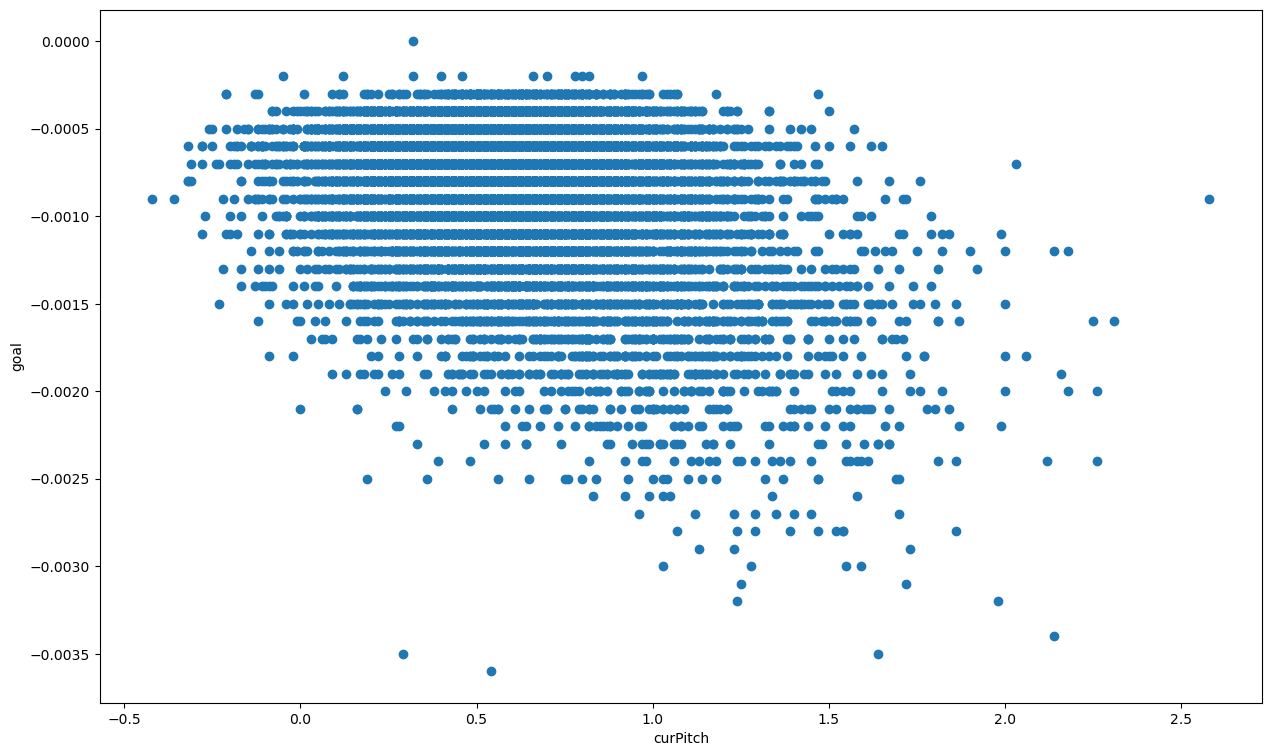

In [3]:
feat = 'curPitch'

data_plot = data.sort_values(by=feat)

plt.figure(figsize=(15,9))
plt.plot(data_plot[feat], data_plot['goal'], marker ='o', linewidth=0)
plt.xlabel(feat)
plt.ylabel('goal')

plt.show()


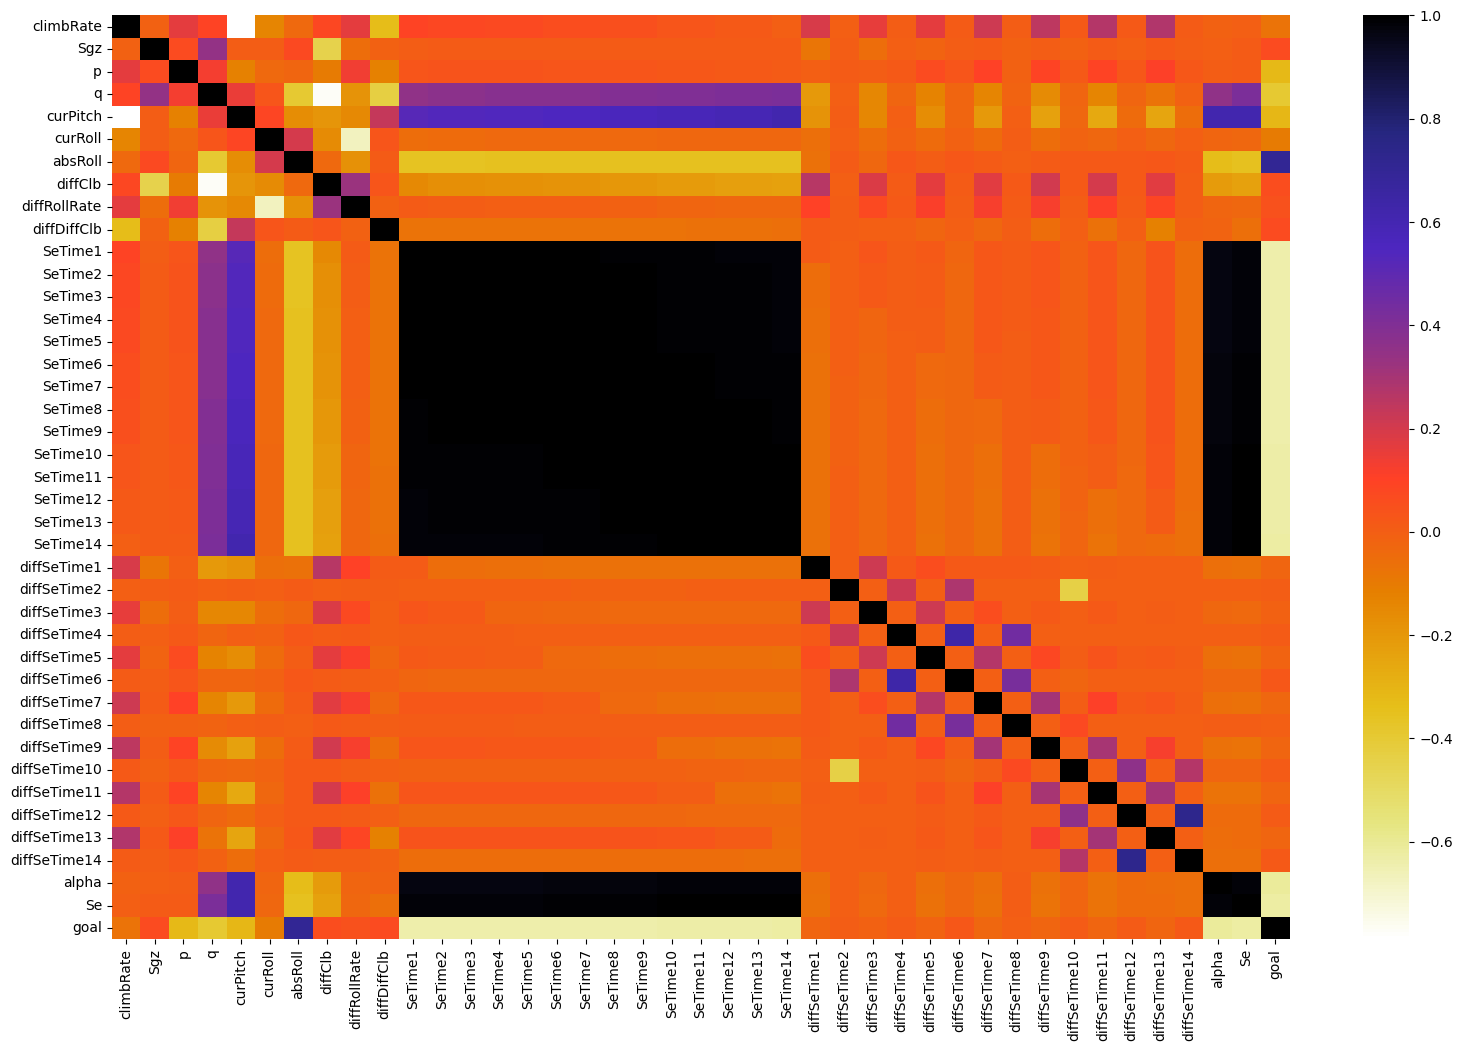

In [4]:
cor = data.corr()
plt.figure(figsize=(19,12))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show() 

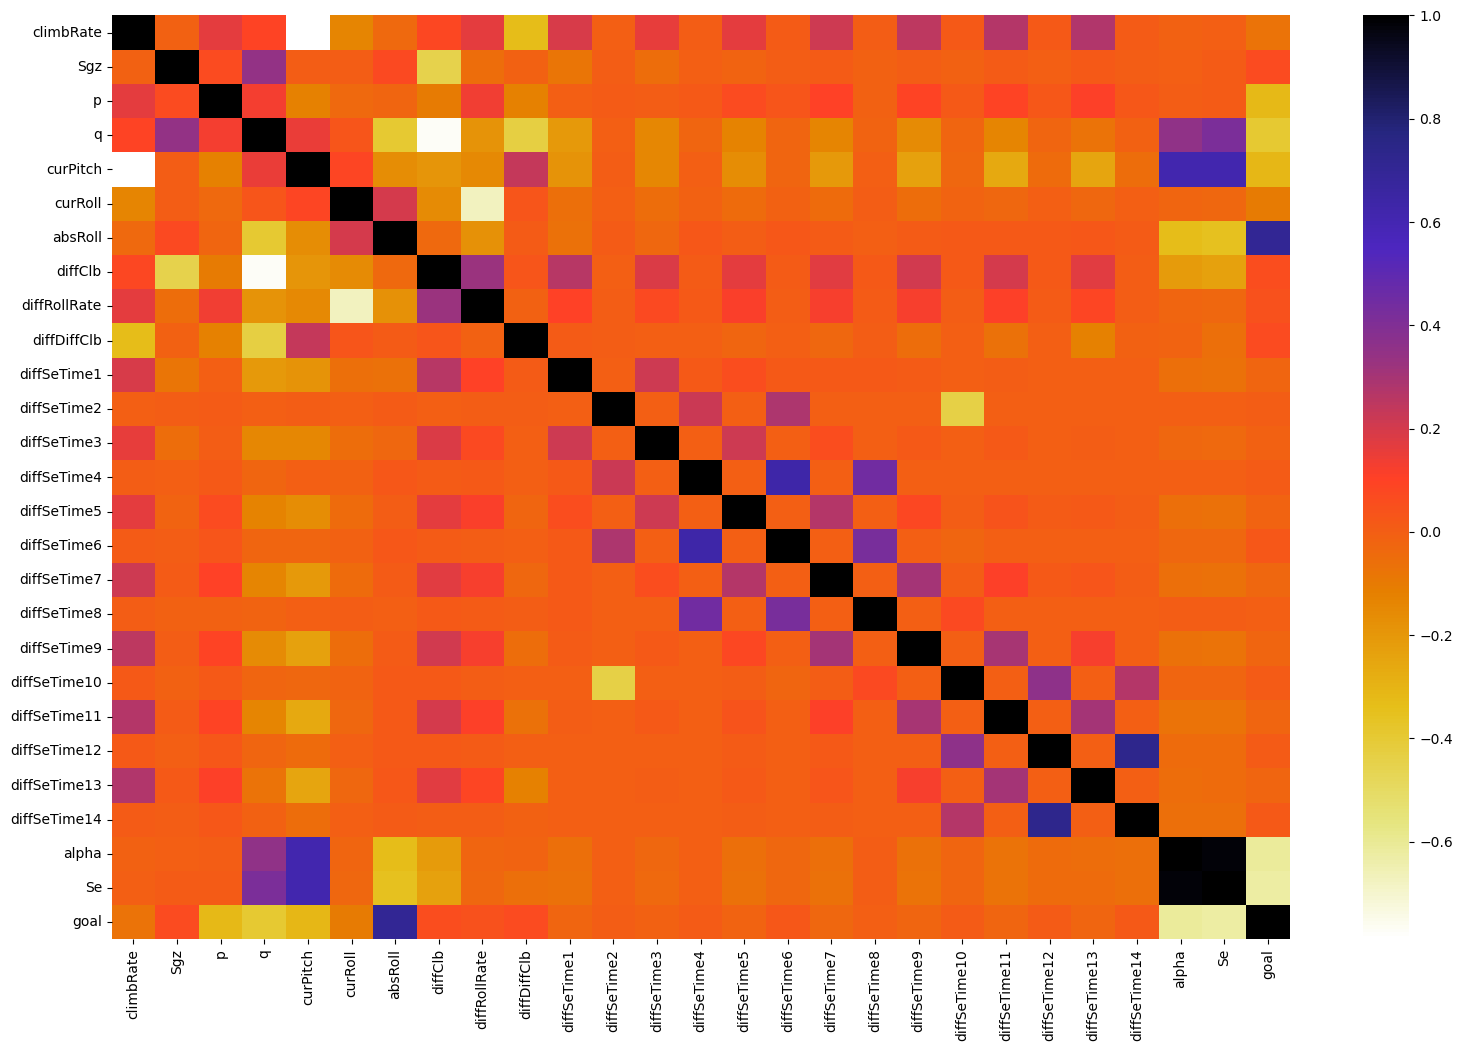

In [6]:
data = data.drop([f'SeTime{i}' for i in np.arange(1,15)], axis=1)
cor1 = data.corr()
plt.figure(figsize=(19,12))
sns.heatmap(cor1, cmap=plt.cm.CMRmap_r)
plt.show()

Scaling

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)
data1=pd.DataFrame(scaler.transform(data))
data1 = data1.set_axis(data.columns, axis=1)

Parameter tuning with cross validation

In [8]:
from kNN_Regressor import KNNRegressor, knnCV

neighbors = [3,5,7,9]
folds = 5
r2, mse, rmse, mae = knnCV(data1, 'goal', neighbors, folds)

metric:  euclidean
number of neighbors:  3
number of neighbors:  5
number of neighbors:  7
number of neighbors:  9


In [35]:
r2_save = r2
mse_save = mse
rmse_save = rmse
mae_save = mae

Heatmaps

<Figure size 640x480 with 0 Axes>

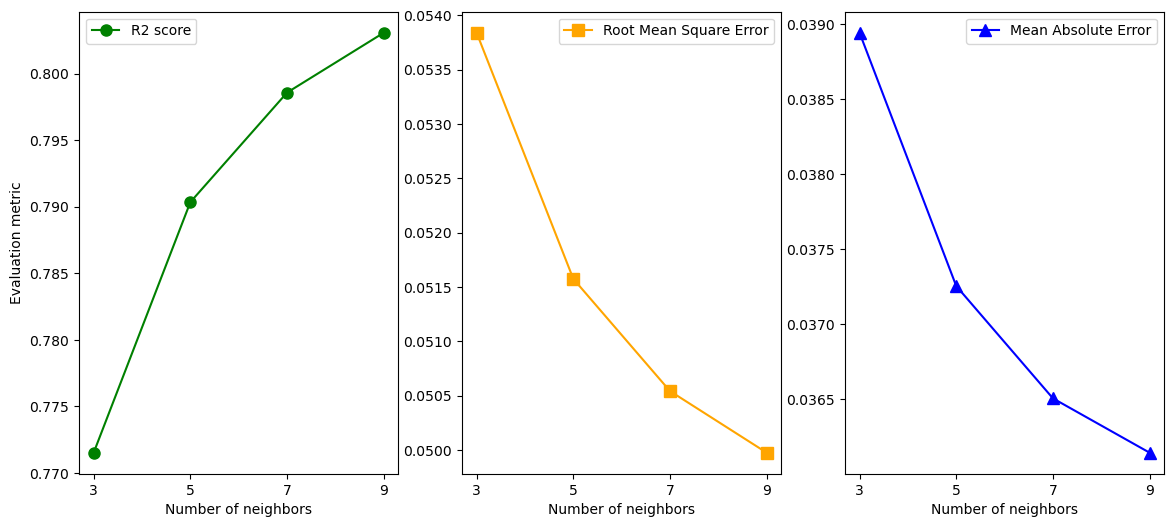

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(14,6))

fig = plt.gcf()

plt.subplot(131)
plt.plot(r2[:,0],color='Green',label='R2 score', marker = 'o', markersize = 8)

plt.xlabel('Number of neighbors')
plt.xticks([0,1,2,3], [3,5,7,9])
plt.ylabel('Evaluation metric')
plt.legend()

plt.subplot(132)
plt.plot(rmse[:,0],color='Orange',label='Root Mean Square Error', marker = 's', markersize = 8)

plt.xlabel('Number of neighbors')
plt.xticks([0,1,2,3], [3,5,7,9])

plt.legend()

plt.subplot(133)
plt.plot(mae[:,0],color='Blue',label='Mean Absolute Error', marker = '^', markersize = 8)
plt.legend()
plt.xlabel('Number of neighbors')
plt.xticks([0,1,2,3], [3,5,7,9])

plt.savefig('dependence_on_neighbors.png', dpi=600)


plt.show()
plt.draw()

Holdout

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = np.asarray(data1.drop(['goal'], axis=1).astype(float))
y = np.asarray(data1['goal'].astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 1)


In [38]:
from kNN_Regressor import KNNRegressor
# instantiate
knn = KNNRegressor(k = 10, metric = 'euclidean')

# fit
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred)**0.5)
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 score:  0.7949892151167269
MSE:  0.0024854657687991026
RMSE:  0.049854445827820636
MAE:  0.03650303030303031


Comparison with sklearn kNN

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn_skl = KNeighborsRegressor (n_neighbors= 10, metric='manhattan')

# fit
knn_skl.fit(X_train, y_train)
y_pred_knn_skl = knn_skl.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred_knn_skl))
print('MSE: ', mean_squared_error(y_test, y_pred_knn_skl))
print('RMSE: ', mean_squared_error(y_test, y_pred_knn_skl)**0.5)
print('MAE: ', mean_absolute_error(y_test, y_pred_knn_skl))

R2 score:  0.8009024091671748
MSE:  0.002413776655443322
RMSE:  0.04913020105233971
MAE:  0.03608080808080808


Comparison with sklearn Reg Tree

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth':[1,2,3,4,5,6,7,8], 'min_samples_leaf':[1,2,3,5,6,7,8,9,10,11,12,13]}
dtr = DecisionTreeRegressor()
gs = GridSearchCV(dtr, parameters, refit = True, cv= 10)
gs.fit(X, y)
print(gs.best_estimator_)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=12)


In [42]:

dtr = DecisionTreeRegressor (max_depth = 8, min_samples_leaf = 12 )

# fit
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred_dtr))
print('MSE: ', mean_squared_error(y_test, y_pred_dtr))
print('RMSE: ', mean_squared_error(y_test, y_pred_dtr)**0.5)
print('MAE: ', mean_absolute_error(y_test, y_pred_dtr))

R2 score:  0.7795072527336262
MSE:  0.002673162662691498
RMSE:  0.051702636902690925
MAE:  0.038303817198075026
